## Import Libraries
The libraries used in this homework are already preinstalled in Google Colab. If you are working locally, make sure to create a virtual environment and install the required libraries there.

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/halilibrahimumutcolak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halilibrahimumutcolak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data

In [266]:
# Downloading data
import gdown
data_url = "https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS"
save_path = "imdb_dataset.csv"
gdown.download(data_url, save_path)

Downloading...
From: https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS
To: /Users/halilibrahimumutcolak/Desktop/cs412hw2/imdb_dataset.csv
100%|██████████| 66.2M/66.2M [00:03<00:00, 16.7MB/s]


'imdb_dataset.csv'

In [267]:
df = pd.read_csv("imdb_dataset.csv")

## **1. Preproces text data** (30 pts)
In this section, you have to preprocess the text data in order to convert it to a numerical representation that can be passed to machine learning models.

### 1.1 **Remove HTML**
Since these reviews were scraped from the internet, some of them still have some HTML tags (like \<a> or \<br>). These tags do not have any semantic meaning. Therefore, we have to remove them to avoid having noise in our data. Otherwise, the model will assume that these are words that have meanings. Here is one example of HTML tags in our data:

In [268]:
df.loc[1, 'review']

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [269]:
# Remove HTML
# Function to remove HTML tags from a given text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply the remove_html_tags function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)

df.loc[1, 'review']

/var/folders/gp/xj9546954wjfm7yyl8jflm5r0000gn/T/ipykernel_26333/818014833.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

### 1.2 **Converting text to lowercase**

In text analysis, we usually convert text to lowercase to avoid having a very large vocabulary. For instance, if we do not convert the text to lowercase, the model will treat "apple", "Apple", and "APPLE" as completely different words. This way the number of words that the model has to know (which we call vocabulary) becomes very large.

In [270]:
# Convert to lower case

# Function to remove HTML tags from a given text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()


# Apply the convert_to_lowercase function to the 'review' column
df['review'] = df['review'].apply(convert_to_lowercase)

df.loc[1, 'review']


'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

### 1.3 **Remove punctuation and special characters**
Since our goal in this task is sentiment analysis, punctuations and special characters (like parantheses, percentage signs, etc.) do not change the sentiment of a movie review. Therefore we remove them to reduce the vocabulary size. One may argue that the exclamation (!) mark may affect the intensity of a sentiment. You have the choice to choose which punctuation marks to remove and which ones to keep. You have to remove some of them though to get the points for this part :)

In [271]:
import string


# Remove punctuation and special characters
def remove_punctuation(text):
    # Define the custom set of punctuation marks to keep
    custom_punctuation = ['!', '.', '?']  # Added question mark as an optional punctuation to retain

    # Remove all punctuation except the custom set
    translator = str.maketrans('', '', f'{string.punctuation.replace("".join(custom_punctuation), "")}')
    return text.translate(translator)

df['review'] = df['review'].apply(remove_punctuation)

### 1.4 **Tokenization**
Now we want to convert each review into a sequence of words. This process is called tokenization. **Use `word_tokenize` from the `nltk.tokenize` module to tokenize each review**.

In [272]:
from nltk.tokenize import word_tokenize

test = 'Hello! this is a test'
print(f"Tokenized sentence: {word_tokenize(test)}")

Tokenized sentence: ['Hello', '!', 'this', 'is', 'a', 'test']


In [273]:
# Tokenize the review texts
def tokenize_text(text):
    return word_tokenize(text)

df['review'] = df['review'].apply(tokenize_text)

print(df[['review']].head())


                                              review
0  [one, of, the, other, reviewers, has, mentione...
1  [a, wonderful, little, production, the, filmin...
2  [i, thought, this, was, a, wonderful, way, to,...
3  [basically, theres, a, family, where, a, littl...
4  [petter, matteis, love, in, the, time, of, mon...


### 1.5 **Removing stop words**


We also need to remove the stopwords (is, the, you, etc.) since they do not add to the meaning. Why? To reduce the vocabulary size 😃. **You can get a list of all stopwords from the nltk library**.

In [274]:
# Remove stop words
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['review'] = df['review'].apply(remove_stopwords)

print(df[['review']].head())


                                              review
0  [one, reviewers, mentioned, watching, 1, oz, e...
1  [wonderful, little, production, filming, techn...
2  [thought, wonderful, way, spend, time, hot, su...
3  [basically, theres, family, little, boy, jake,...
4  [petter, matteis, love, time, money, visually,...


### 1.6 **Stemming**

Apply stemming using one of the `SnowballStemmer` stemmers in the nltk library.

In [275]:
# Apply Stemming
from nltk.stem import SnowballStemmer

# Function to apply stemming using SnowballStemmer
def apply_stemming(tokens):
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(word) for word in tokens]

# Apply the apply_stemming function to the 'filtered_review' column
df['review'] = df['review'].apply(apply_stemming)

# Display the DataFrame with the stemmed reviews
print(df["review"].head())

0    [one, review, mention, watch, 1, oz, episod, y...
1    [wonder, littl, product, film, techniqu, unass...
2    [thought, wonder, way, spend, time, hot, summe...
3    [basic, there, famili, littl, boy, jake, think...
4    [petter, mattei, love, time, money, visual, st...
Name: review, dtype: object


### 1.7 **Joining review text**
Now that we have removed the stopwords and applied stemming on each word, we need to convert each review from a list of word to a space-separated string. The reason we do this is that the functions that are used to extract numerical representations from text expect the input to be a single string not a list of words.

**Convert each review from a list of words to a space-separated string.**

In [276]:
# Your solution
# Convert each review from a list of words to a space-separated string
df['review'] = df['review'].apply(lambda x: ' '.join(x))

# Display the DataFrame with the converted reviews
print(df['review'].head())


0    one review mention watch 1 oz episod youll hoo...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic there famili littl boy jake think there ...
4    petter mattei love time money visual stun film...
Name: review, dtype: object


## 2. **Buidling Simple NN Models** (70 Pts)
In this section, you will build neural network models to predict the sentiment of each review. You will build three models, where each of the models uses a different numerical representation of the text.

In [277]:
# Import all necessary libraries here
from collections import Counter

### 2.1 **Data preparation**

#### 2.1.1 **Encoding labels**
Encode the labels ("positive" and "negative") as 0 for "negative" and 1 for "positive".

In [278]:
# Encode labels
# Encode labels
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Display the DataFrame with encoded labels
print(df[['review', 'sentiment']].head())


                                              review  sentiment
0  one review mention watch 1 oz episod youll hoo...          1
1  wonder littl product film techniqu unassum old...          1
2  thought wonder way spend time hot summer weeke...          1
3  basic there famili littl boy jake think there ...          0
4  petter mattei love time money visual stun film...          1


#### 2.1.2 **Splitting data**
Split your data into train, validation, and test sets. You should use 80% of your data for training and 20% for testing. You should also use 20% of your training data for validation. **Set random_state to 42 to ensure consistent results.**

Hint: You can pass parameters in Keras to use some of your data for validation while training.

In [279]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review'],  # Features (review text)
    df['sentiment'],  # Labels (sentiment)
    test_size=0.2,  # 20% for testing
    random_state=42  # Set random_state for reproducibility
)

# Split the training data into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data,
    train_labels,
    test_size=0.2,  # 20% for validation
    random_state=42
)

# Display the shapes of the resulting sets
print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")


Train data shape: (32000,)
Validation data shape: (8000,)
Test data shape: (10000,)


#### **Exploring vocabulary**
Create a dictionary that maps each word in your training data to the number of times it occurs in the training data. The dictionary should have the following format:

```
vocab_count = {
  "word1": 1,
  "word2": 120,
  ...
}
```

In [280]:


# Tokenize the training data
train_tokens = [word_tokenize(text) for text in train_data]

# Flatten the list of tokens
flat_tokens = [token for sublist in train_tokens for token in sublist]

# Create a dictionary for vocabulary count in training data
vocab_count = Counter(flat_tokens)

# Display the first few entries of the vocabulary count dictionary
print({k: vocab_count[k] for k in list(vocab_count)[:5]})


{'fault': 402, 'actor': 8403, 'put': 3975, 'great': 11682, 'perform': 6687}


Vocabulary size: 134185
Top 15 frequent words: movi, film, one, like, time, good, make, see, charact, get, watch, even, stori, would, realli
Least frequent 15 words: itbuy, girlssur, handheldcamera, soundwis, wisethan, eurohous, hardrockmi, halfsh, liethi, awaymild, heralthough, failbeyond, occurredestevez, itrecommend, ushad



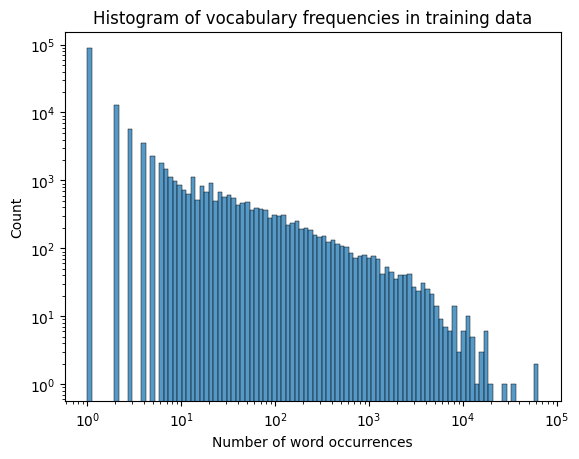

In [281]:
# Run this cell to explore the vocabulary
import seaborn as sns
count_arr = np.array(list(vocab_count.values()))
vocab = np.array(list(vocab_count.keys()))

# Sorting by frequency
sort_idx = np.argsort(count_arr)[::-1]
vocab = vocab[sort_idx]
count_arr = count_arr[sort_idx]

print(f"Vocabulary size: {len(vocab)}")
print(f"Top 15 frequent words: {', '.join(vocab[:15])}")
print(f"Least frequent 15 words: {', '.join(vocab[-15:])}")
print()

ax = sns.histplot(count_arr, log_scale=True, bins=100)
ax.set_yscale('log')
ax.set_xlabel('Number of word occurrences')
ax.set_title("Histogram of vocabulary frequencies in training data")
plt.show()

### 2.2 **Bag of Words (BoW) model**
Create a simple NN model that utilizes the Bag of Words representation.

#### 2.2.1 **Generate Bag of Words (BoW) representation**

You can use the `CountVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `CountVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `CountVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument. This argument determines how many words will be included in your vocabulary. For example, if your total vocabulary count is 100,000 and you set `max_features = 2,000`, `CountVectorizer` will only consider the **most frequent** 2,000 words in your vocabulary. The rest of the vocabulary will be ignored.

* [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [282]:
from sklearn.feature_extraction.text import CountVectorizer

# Choose a value for max_features
max_features = 5000  # Adjust as needed

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
train_bow = vectorizer.fit_transform(train_data)

# Transform the train and test data
test_bow = vectorizer.transform(test_data)

# Display the shape of the resulting BoW matrices
print(f"Shape of train_bow: {train_bow.shape}")
print(f"Shape of test_bow: {test_bow.shape}")


Shape of train_bow: (32000, 5000)
Shape of test_bow: (10000, 5000)


In [283]:
# The shape of the train data BoW representation should be
# (Number of data points in training data x max_features)
print(train_bow.shape)

(32000, 5000)


#### 2.2.2 **Train a neural network on BoW data**
Use a small neural network to predict the sentiment of reviews from the BoW representation of the reviews. Use the keras library for this task.

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [284]:
from keras.models import Sequential
from keras.layers import Dense

In [285]:
from keras.models import Sequential
from keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=max_features))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
# Set validation_split=0.20 to use 20% of the train data for validation
history = model.fit(train_bow.toarray(), train_labels, epochs=10, batch_size=32, validation_split=0.20)


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 64)                320064    
                                                                 
 dense_88 (Dense)            (None, 32)                2080      
                                                                 
 dense_89 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322177 (1.23 MB)
Trainable params: 322177 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3498 - accuracy: 0.8560 - val_loss: 0.3014 - val_accuracy: 0.8786
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.2081 - accuracy: 0.9176 - val_loss: 0.3163 - val_accuracy: 0.8702
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9605 - val_loss: 0.4260 - val_accuracy: 0.8666
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.6102 - val_accuracy: 0.8642
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.7700 - val_accuracy: 0.8667
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.9367 - val_accuracy: 0.8627
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.9957 - val_accuracy: 0.8633
Epoch 

#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

**Note**: Evaluation on the test dataset should only be done once. Updating your model iteratively until you get a good performance on the test dataset is not a good practice and will result in overfitting on the test dataset.

In [286]:
# Evaluate the model on the test set
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_bow.toarray(), test_labels)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 0s 562us/step - loss: 1.1054 - accuracy: 0.8631
Test Loss: 1.1054
Test Accuracy: 0.8631


### 2.3 **TF-IDF**

Create a simple NN model that utilizes the TF-IDF representation.

#### 2.3.1 **Generate TF-IDF representation**

You can use the `TfidfVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `TfidfVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `TfidfVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument.

* [TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Choose a value for max_features
max_features = 5000  # Adjust as needed

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
train_tfidf = tfidf_vectorizer.fit_transform(train_data)

# Transform the train and test data
test_tfidf = tfidf_vectorizer.transform(test_data)


#### 2.3.2 **Train a neural network on TF-IDF data**
Use a small neural network to predict the sentiment of reviews from the TF-IDF representation of the reviews. Use the keras library for this task. **You can use the same neural network structure form the BoW model.**

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [288]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'train_tfidf' is your input TF-IDF data and 'train_labels' are your labels
print("train_tfidf shape:", train_tfidf.shape)
print("train_labels shape:", train_labels.shape)
input_shape = train_tfidf.shape[1]

# Build the Model
model_tfidf = Sequential()
model_tfidf.add(Dense(64, activation='relu', input_shape=(input_shape,)))  # First hidden layer
model_tfidf.add(Dense(32, activation='relu'))  # Second hidden layer
model_tfidf.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show Model Summary
model_tfidf.summary()

# Train the Model
# Assuming train_labels has the correct shape (32000,)
history_tfidf = model_tfidf.fit(train_tfidf.toarray(), train_labels, epochs=10, validation_split=0.20)



train_tfidf shape: (32000, 5000)
train_labels shape: (32000,)
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 64)                320064    
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dense_92 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322177 (1.23 MB)
Trainable params: 322177 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8628 - val_loss: 0.2875 - val_accuracy: 0.8800
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.2281 - accuracy: 0.9102 - val_loss: 0.3054 - val_accuracy: 0.8758
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1930 - accuracy: 0.9258 - val_loss: 0.3223 - val_accuracy: 0.8706
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1445 - accuracy: 0.9467 - val_loss: 0.3620 - val_accuracy: 0.8581
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0813 - accuracy: 0.9741 - val_loss: 0.4619 - val_accuracy: 0.8595
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.5606 - val_accuracy: 0.8572
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.7385 - val_accuracy: 0.8561
Epoch 

#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

In [289]:
# Assuming 'test_tfidf' is your input TF-IDF data for the test set and 'test_labels' are the corresponding labels
evaluation_results = model_tfidf.evaluate(test_tfidf.toarray(), test_labels)

# Extract the loss and accuracy from the results
test_loss, test_accuracy = evaluation_results

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 0s 496us/step - loss: 1.0624 - accuracy: 0.8627
Test Loss: 1.0624
Test Accuracy: 0.8627


### 2.4 **Word2Vec**
In this section, you will use Word2Vec representations to train a simple neural network to predict the sentiments of reviews.

#### 2.4.1 **Preliminary About Word2Vec**

In [290]:
import gensim.downloader
from gensim.models import Word2Vec

The following cell will load a pretrained Word2Vec model. This is a model trained on a large corpus of data to produce meaningful representations of words as vectors.

In [291]:
# Loading pretrained Word2Vec model (Word embeddings)
model_name = "glove-wiki-gigaword-100"
word_to_vec = gensim.downloader.load(model_name)

In [292]:
# Getting the representation of a word
dog = word_to_vec["dog"]
dog

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

These representations are meaningful in a sense that words that have similar meanings are closer to each other. In general, when dealing with vector representations, we use **cosine similarity** to see how similar two vectors are. it returns a value between -1 and +1, the higher the value the more similar two vectors are.

Notice in the example below that **car** is more similar to **vehicle** than **cat**.

In [293]:
from  sklearn.metrics.pairwise import cosine_similarity
car = word_to_vec["car"].reshape(1, -1) # Reshaping because cosine_similarity function requires a 2D array
cat = word_to_vec["cat"].reshape(1, -1)
vehicle = word_to_vec["vehicle"].reshape(1, -1)

print(f"Similarity between car and cat: {cosine_similarity(car, cat)}")
print(f"Similarity between car and vehicle: {cosine_similarity(car, vehicle)}")

Similarity between car and cat: [[0.31097826]]
Similarity between car and vehicle: [[0.86308384]]


#### 2.4.2 **Use pretrained Word2Vec model**
First, you will try to use the pretrained Word2Vec model to generate representations for each review and use the representation to train a neural network.

Remember that we are trying to classify movie reviews, which have can have any number of words. Word2Vec returns a vector representation for each word. Therefore, you have to find a way to create a **fixed-sized representation** for the whole review. Fixed-size means that the vector representation of each review should have the same size regardless of the length of the review.

In [294]:
import numpy as np

def vectorize(review, word_to_vec):
    # Split the review into individual words
    words = review.split()

    # Initialize an array to store word vectors
    word_vectors = []

    # Iterate over words and add their vectors to the array
    for word in words:
        if word in word_to_vec:
            word_vectors.append(word_to_vec[word])

    # Check if there are any valid word vectors
    if word_vectors:
        # Average the word vectors to create a fixed-sized representation
        review_vector = np.mean(word_vectors, axis=0)
    else:
        # If no valid word vectors, return a zero vector
        review_vector = np.zeros_like(word_to_vec["word"])  # Assuming "word" is in the vocabulary

    return review_vector

# Apply the vectorize function to convert train and test reviews to vector representations
train_vectors = np.array([vectorize(review, word_to_vec) for review in train_data])
test_vectors = np.array([vectorize(review, word_to_vec) for review in test_data])


Train a neural network:

In [295]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'train_vectors' is your input Word2Vec data and 'train_labels' are your labels
print("train_vectors shape:", train_vectors.shape)
print("train_labels shape:", train_labels.shape)
input_shape = train_vectors.shape[1]

# Build the Model
model_word2vec = Sequential()
model_word2vec.add(Dense(64, activation='relu', input_shape=(input_shape,)))  # First hidden layer
model_word2vec.add(Dense(32, activation='relu'))  # Second hidden layer
model_word2vec.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model_word2vec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show Model Summary
model_word2vec.summary()

# Train the Model
history_word2vec = model_word2vec.fit(train_vectors, train_labels, epochs=10, validation_split=0.20)


train_vectors shape: (32000, 100)
train_labels shape: (32000,)
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 64)                6464      
                                                                 
 dense_94 (Dense)            (None, 32)                2080      
                                                                 
 dense_95 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8577 (33.50 KB)
Trainable params: 8577 (33.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
800/800 [==============================] - 1s 564us/step - loss: 0.5485 - accuracy: 0.7252 - val_loss: 0.5069 - val_accuracy: 0.7564
Epoch 2/10
800/800 [==============================] - 0s 495us/step - loss: 0.5069 - accuracy: 0.7550 - val_loss: 0.5077 - val_accuracy: 0.7498
Epoch 3/10
800/800 [==============================] - 0s 498us/step - loss: 0.5019 - accuracy: 0.7556 - val_loss: 0.4993 - val_accuracy: 0.7564
Epoch 4/10
800/800 [==============================] - 0s 495us/step - loss: 0.4946 - accuracy: 0.7599 - val_loss: 0.4934 - val_accuracy: 0.7658
Epoch 5/10
800/800 [==============================] - 0s 498us/step - loss: 0.4904 - accuracy: 0.7653 - val_loss: 0.4898 - val_accuracy: 0.7659
Epoch 6/10
800/800 [==============================] - 0s 494us/step - loss: 0.4859 - accuracy: 0.7670 - val_loss: 0.4890 - val_accuracy: 0.7631
Epoch 7/10
800/800 [==============================] - 0s 498us/step - loss: 0.4829 - accuracy: 0.7701 - val_loss: 0.4896 - val_accuracy:

Evaluate the model on the test dataset:

In [296]:
# Evaluate the Model on the test set
test_loss, test_accuracy = model_word2vec.evaluate(test_vectors, test_labels)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 0s 346us/step - loss: 0.4836 - accuracy: 0.7676
Test Loss: 0.4836
Test Accuracy: 0.7676


#### 2.4.3 **Train your own Word2Vec model**
In cases where we have enough data, training a new Word2Vec model may provide better results than using a pretrained one. Here, you will train your own Word2Vec model using the training data and then use it to create vector representations for the reviews.

You can change the hyperparameters to train your Word2Vec model:
* **vector_size**: The length of the vector that will be used to represent words.
* **window**: The window sized used in the Word2Vec training
* **min_count**: Minimum number of occurunces for a word to be included in the model.


In [297]:
# Converting sentences to list of words
sentences = [sentence.split() for sentence in train_data]

# Training model
vector_size = 500
window = 5
min_count = 5

w2v_model = Word2Vec(
    sentences,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=4)

Apply the same function you created above to create vector representations for the reviews from your trained Word2Vec model:

In [298]:
def vectorize(review, model):
    # Get word vectors for each word in the review
    word_vectors = [model.wv[word] for word in review.split() if word in model.wv.key_to_index]

    # If no word vectors found, return a zero vector
    if not word_vectors:
        return np.zeros(model.vector_size)

    # Average the word vectors to get a fixed-sized vector for the review
    review_vector = np.mean(word_vectors, axis=0)
    return review_vector

# Applying the function to convert train and test reviews to vector representations
train_vectors = np.array([vectorize(review, w2v_model) for review in train_data])
test_vectors = np.array([vectorize(review, w2v_model) for review in test_data])


Train a neural network:

In [299]:
# Build the neural network model
from keras.models import Sequential
from keras.layers import Dense

model_word2vec = Sequential()
model_word2vec.add(Dense(64, activation='relu', input_shape=(vector_size,)))
model_word2vec.add(Dense(32, activation='relu'))
model_word2vec.add(Dense(1, activation='sigmoid'))

model_word2vec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model_word2vec.summary()

# Train the model
history_word2vec = model_word2vec.fit(train_vectors, train_labels, epochs=10, validation_split=0.20)



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                32064     
                                                                 


 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 1)                 33        
                                                                 
Total params: 34177 (133.50 KB)
Trainable params: 34177 (133.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
800/800 [==============================] - 1s 672us/step - loss: 0.3760 - accuracy: 0.8361 - val_loss: 0.3934 - val_accuracy: 0.8214
Epoch 2/10
800/800 [==============================] - 0s 612us/step - loss: 0.3478 - accuracy: 0.8493 - val_loss: 0.3446 - val_accuracy: 0.8489
Epoch 3/10
800/800 [==============================] - 0s 582us/step - loss: 0.3391 - accuracy: 0.8551 - val_loss: 0.3396 - val_accuracy: 0.8536
Epoch 4/10
800/800 [==============================] - 0s 560us/step - loss: 0.3335 - accuracy: 0.8556 - val_loss: 0.3496 - val_accurac

Evaluate the model on the test dataset:

In [300]:
# Evaluate the Model# Evaluate the model on the test dataset
test_loss, test_accuracy = model_word2vec.evaluate(test_vectors, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 0s 369us/step - loss: 0.3334 - accuracy: 0.8535
Test Loss: 0.3334
Test Accuracy: 0.8535
